In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('out.xlsx')
# df['neigh'] = df['Unnamed: 1']
# df['Unnamed: 1']

In [3]:
G = nx.Graph()

In [4]:
def init_graph(G, node_adj_frame):
    for i in range(len(node_adj_frame)):
        G.add_edge(node_adj_frame['sym unweighted'][i], node_adj_frame['Unnamed: 1'][i])

In [5]:
init_graph(G, df)

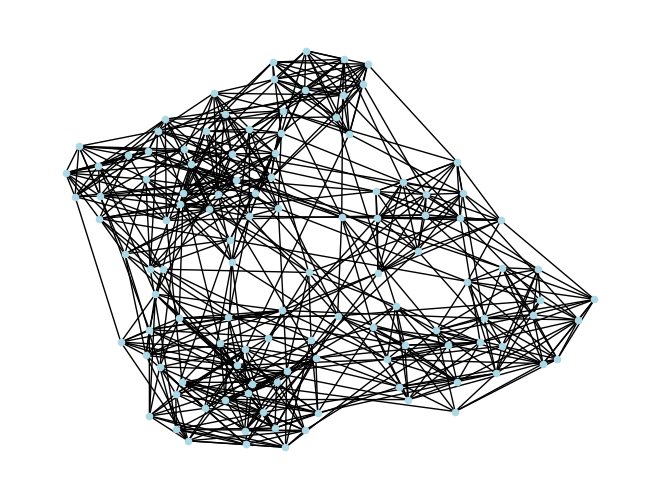

In [6]:
# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as needed
nx.draw(G, pos, with_labels=False, node_size=20, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()

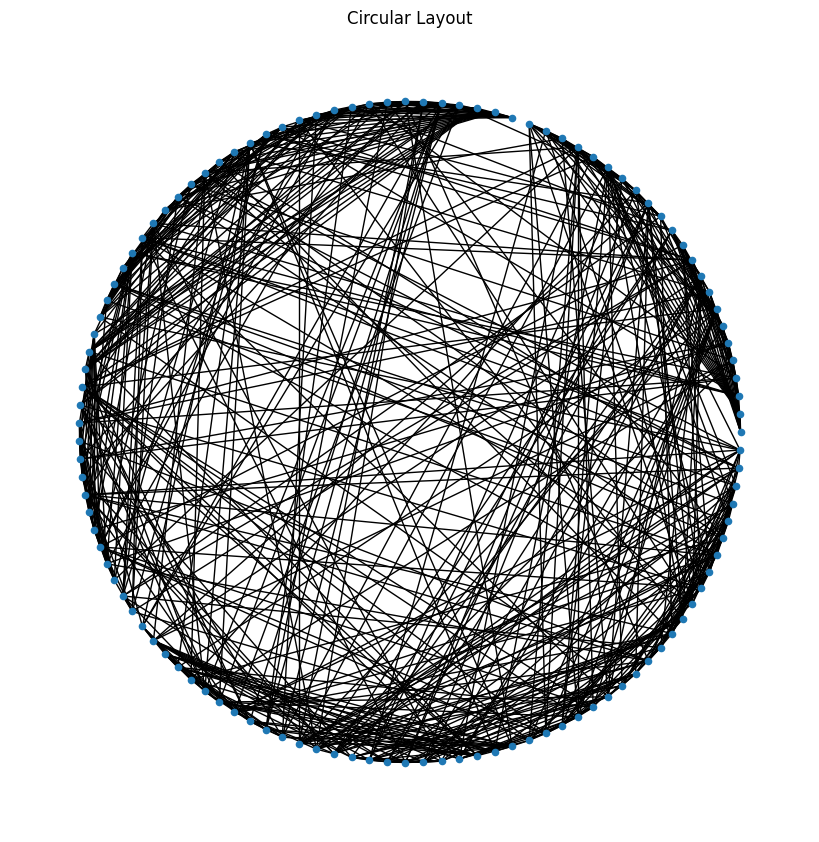

In [7]:
plt.figure(figsize=(8, 8))
pos_circular = nx.circular_layout(G)
nx.draw(G, pos_circular, with_labels=False, font_weight='bold', node_size = 20)
plt.title('Circular Layout')
plt.show()

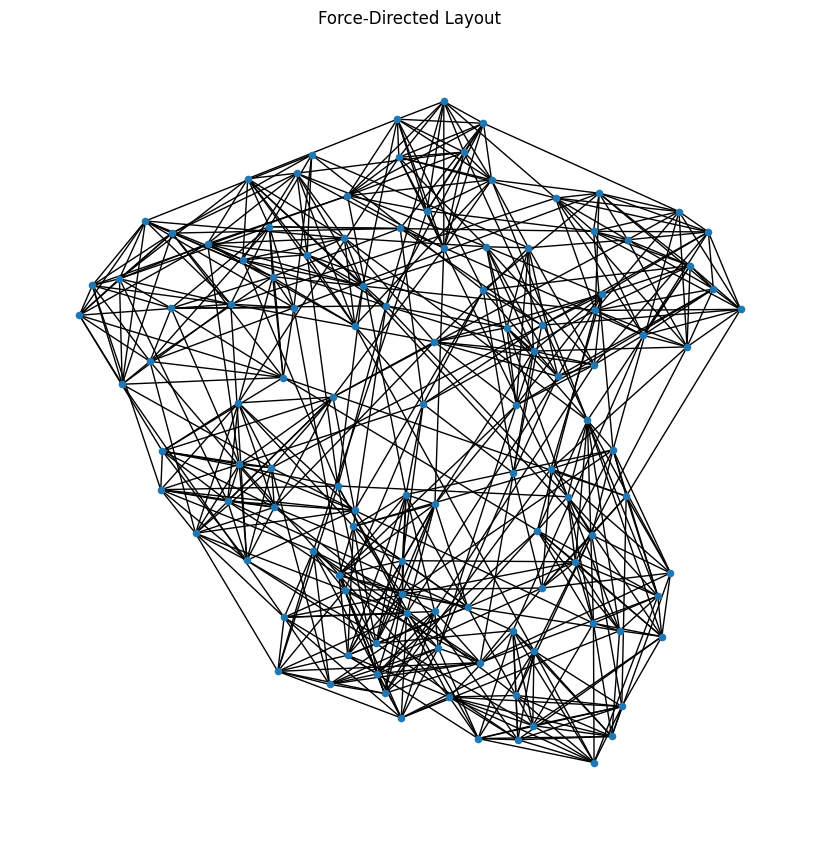

In [12]:
# Force-Directed Layout
plt.figure(figsize=(8, 8))
pos_force = nx.spring_layout(G)
nx.draw(G, pos_force, with_labels=False, font_weight='bold', node_size=20)
plt.title('Force-Directed Layout')
plt.show()

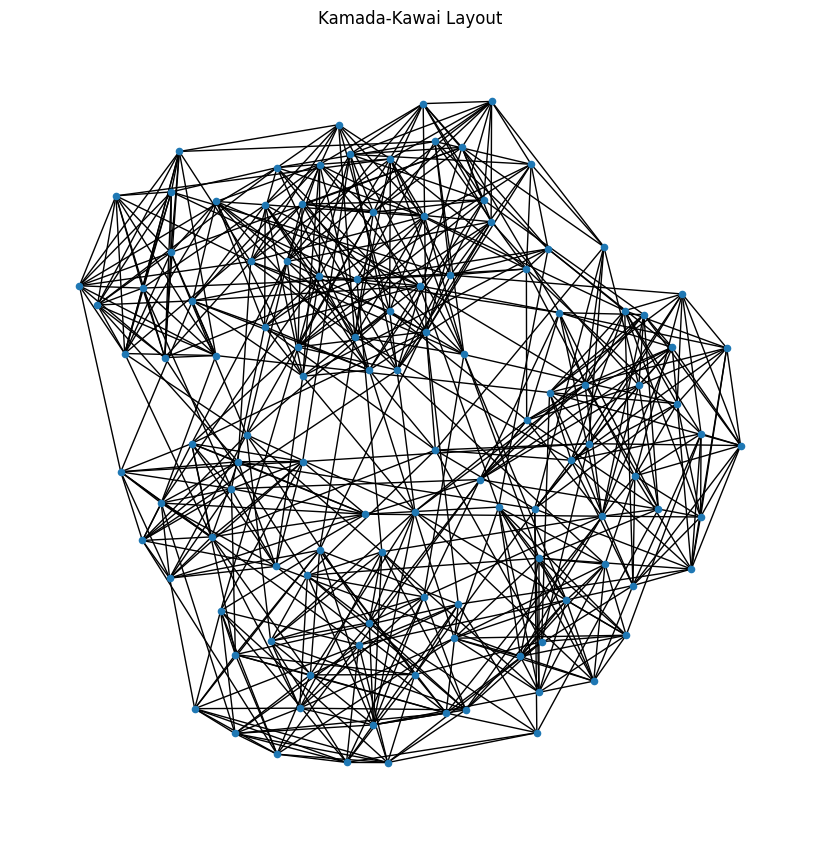

In [13]:
# Kamada-Kawai Layout
plt.figure(figsize=(8, 8))
pos_kamada = nx.kamada_kawai_layout(G)
nx.draw(G, pos_kamada, with_labels=False, font_weight='bold', node_size=20)
plt.title('Kamada-Kawai Layout')
plt.show()

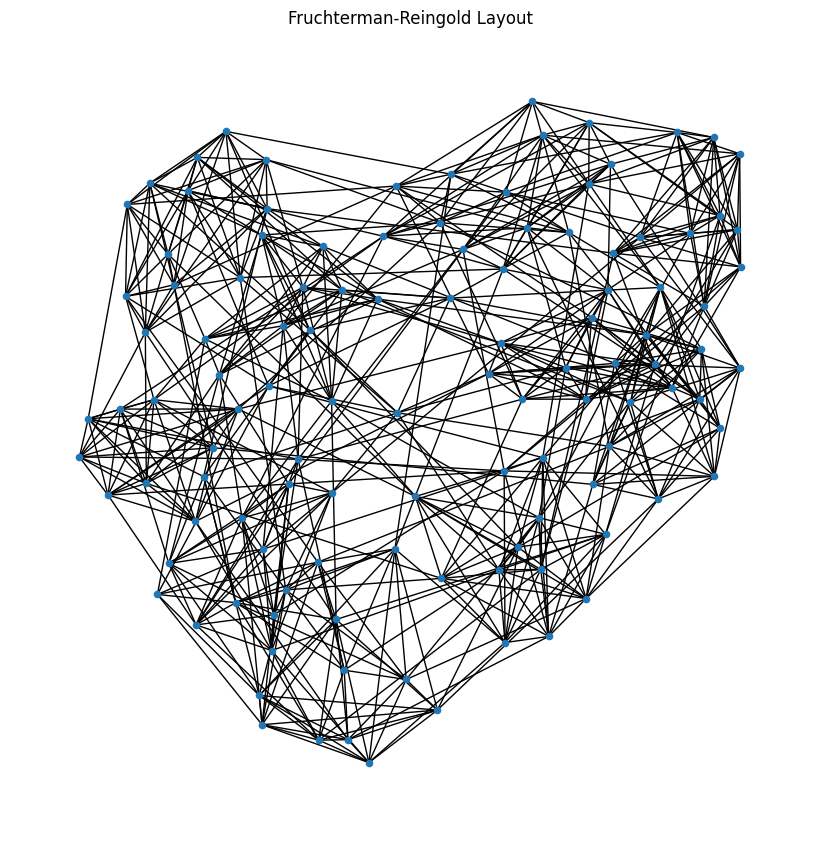

In [14]:
# Fruchterman-Reingold Layout
plt.figure(figsize=(8, 8))
pos_fr = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos_fr, with_labels=False, font_weight='bold', node_size=20)
plt.title('Fruchterman-Reingold Layout')
plt.show()

In [15]:
import community

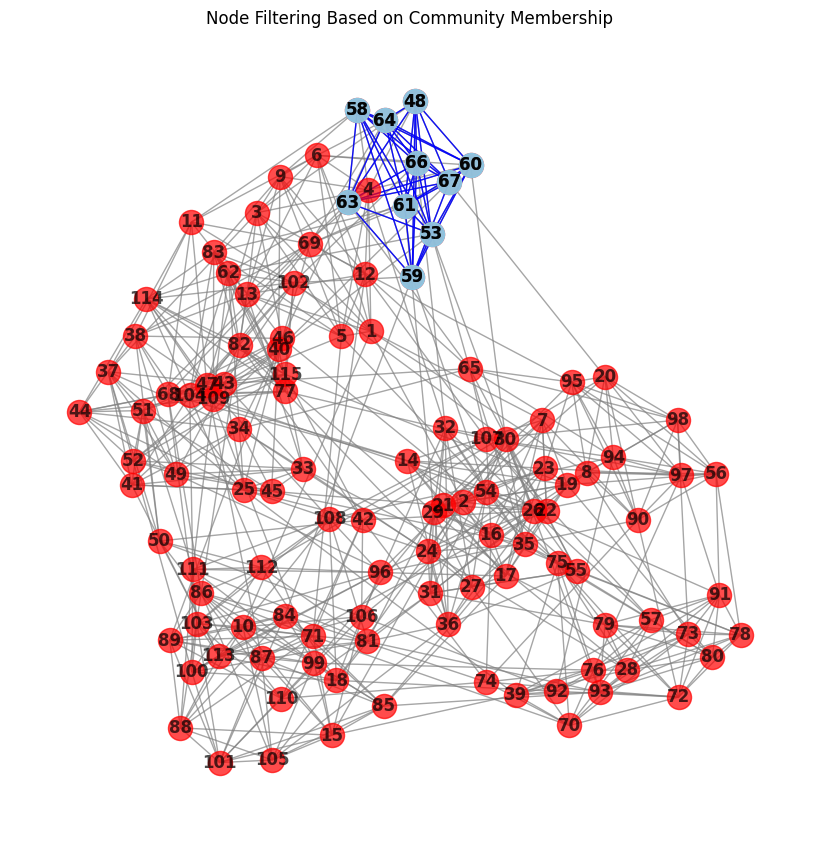

In [21]:
# Detect communities using Louvain algorithm
partition = community.best_partition(G)

# Choose a community to filter (you can change this based on your data)
target_community = 0

# Filter nodes belonging to the target community
filtered_nodes = [node for node, community_id in partition.items() if community_id == target_community]

# Create a subgraph with filtered nodes
subgraph = G.subgraph(filtered_nodes)

# Draw the filtered subgraph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # You can choose another layout algorithm
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='red', edge_color='gray', alpha=0.7)
nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='blue', alpha=0.9)
plt.title('Node Filtering Based on Community Membership')
plt.show()

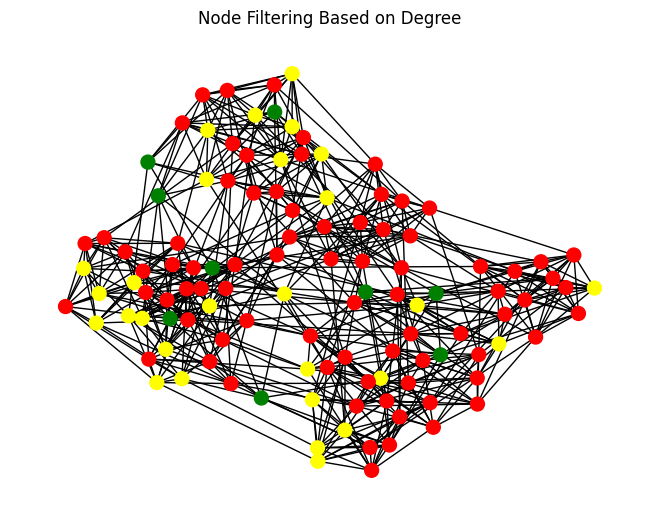

In [38]:
# Compute node degrees
degrees = dict(G.degree())

# Set node colors based on degrees
color_map = []
for node, degree in degrees.items():
    if degree >= 11:
        color_map.append('red')  # High degree nodes in red
    elif degree >= 10:
        color_map.append('yellow')  # Medium degree nodes in yellow
    else:
        color_map.append('green')  # Low degree nodes in green

# Draw the graph with different colors based on degrees
pos = nx.spring_layout(G)  # You can choose another layout if needed
nx.draw(G, pos, node_color=color_map, with_labels=False, font_weight='bold', node_size = 100)
plt.title('Node Filtering Based on Degree')
# Display the plot
plt.show()

# Readme - Network Analysis and Visualization with NetworkX

This Python script performs network analysis and visualization using the NetworkX library on data sourced from an Excel file. The script utilizes Pandas for data handling, creates a graph using NetworkX, and visualizes it through various layout algorithms. Additionally, the script demonstrates community detection, node filtering based on community membership, and node coloring based on degrees.

## Dependencies

- Python 3.x
- Pandas
- NetworkX
- Community
- Matplotlib

Install the required libraries using the following command:

```bash
pip install pandas networkx python-louvain matplotlib

## Usage

1. Place your Excel file containing the data (e.g., 'out.xlsx') in the same directory as the script.
2. Update the file name in the script if it differs from 'out.xlsx'.
3. Run the script.

```python
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt

# Read data from Excel file
df = pd.read_excel('out.xlsx')

# Create an empty graph
G = nx.Graph()

# Function to initialize the graph
def init_graph(G, node_adj_frame):
    for i in range(len(node_adj_frame)):
        G.add_edge(node_adj_frame['sym unweighted'][i], node_adj_frame['Unnamed: 1'][i])

# Initialize the graph with data from the Excel file
init_graph(G, df)

# Draw the graph with Spring Layout
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=20, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Spring Layout')
plt.show()

# ... [Other visualizations and analyses]

plt.show()
## Visualization

The script generates multiple visualizations, showcasing different layout algorithms for network graphs:

### Spring Layout

```python
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=20, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Spring Layout')
plt.show()
```
## Circular Layout
```python
plt.figure(figsize=(8, 8))
pos_circular = nx.circular_layout(G)
nx.draw(G, pos_circular, with_labels=False, font_weight='bold', node_size=20)
plt.title('Circular Layout')
plt.show()
```
## Force Directed Layout
```python
plt.figure(figsize=(8, 8))
pos_force = nx.spring_layout(G)
nx.draw(G, pos_force, with_labels=False, font_weight='bold', node_size=20)
plt.title('Force-Directed Layout')
plt.show()
```

## Kamada-Kawai Layout
```python
plt.figure(figsize=(8, 8))
pos_kamada = nx.kamada_kawai_layout(G)
nx.draw(G, pos_kamada, with_labels=False, font_weight='bold', node_size=20)
plt.title('Kamada-Kawai Layout')
plt.show()
```

## Fruchterman-Reingold Layout
```python
plt.figure(figsize=(8, 8))
pos_fr = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos_fr, with_labels=False, font_weight='bold', node_size=20)
plt.title('Fruchterman-Reingold Layout')
plt.show()
```

## Node Coloring

Nodes in the graph are colored based on their degrees. The script defines different colors for high, medium, and low degree nodes.

```python
# Compute node degrees
degrees = dict(G.degree())

# Set node colors based on degrees
color_map = []
for node, degree in degrees.items():
    if degree >= 11:
        color_map.append('red')  # High degree nodes in red
    elif degree >= 10:
        color_map.append('yellow')  # Medium degree nodes in yellow
    else:
        color_map.append('green')  # Low degree nodes in green

# Draw the graph with different colors based on degrees
pos = nx.spring_layout(G)  # You can choose another layout if needed
nx.draw(G, pos, node_color=color_map, with_labels=False, font_weight='bold', node_size=100)
plt.title('Node Coloring Based on Degree')
plt.show()